# VERITAS ANALYSIS

In [1]:
from vtspy import *

## Step 1. Generate a configuration file

In [2]:
ls ./veritas

95127.anasum.fits  95130.anasum.fits  initial.pickle
95128.anasum.fits  analyzed.pickle    obs-index.fits.gz
95129.anasum.fits  hdu-index.fits.gz  simple.pickle


In [3]:
config = JointConfig(files="./veritas/")

2022-06-23 13:10:08 INFO    : -------------------- Info --------------------
2022-06-23 13:10:08 INFO    : target: 1ES1218+304
2022-06-23 13:10:08 INFO    : localization:
2022-06-23 13:10:08 INFO    : 	(ra, dec) : (185.3412470056114, 30.17694222440679)
2022-06-23 13:10:08 INFO    : 	(glat, glon) : (82.73442268671826, 186.3593855387067)
2022-06-23 13:10:08 INFO    : time interval:
2022-06-23 13:10:08 INFO    : 	veritas : 2020-01-01T11:15:10.479 - 2020-01-01T13:15:02.043
2022-06-23 13:10:08 INFO    : 	fermi : 2020-01-01 00:00:00.000 - 2020-01-02 00:00:00.000
2022-06-23 13:10:08 INFO    : ---------------------------------------------
2022-06-23 13:10:08 INFO    : a configuration file (config.yaml) is created.


In [4]:
config.print_config()

2022-06-23 13:10:08 INFO    : 
fermi:
  binning:
    binsperdec: 8
    binsz: 0.08
    coordsys: CEL
    projtype: WCS
    roiwidth: 12
  data:
    evfile: ./fermi/EV00.lst
    ltcube: null
    scfile: ./fermi/SC00.fits
  fileio:
    logfile: ./fermi/log/fermipy.log
    outdir: ./fermi/
    usescratch: false
  gtlike:
    edisp: true
    edisp_disable:
    - isodiff
    - galdiff
    irfs: P8R3_SOURCE_V3
  model:
    catalogs: /Users/dtak/Research/scripts/vts-fermi/vtspy/refdata/gll_psc_v22.fit
    galdiff: $FERMI_DIFFUSE_DIR/gll_iem_v07.fits
    isodiff: $FERMI_DIFFUSE_DIR/iso_P8R3_SOURCE_V3_v1.txt
    src_roiwidth: 15
  selection:
    dec: 30.17694222440679
    emax: 300000
    emin: 100
    evclass: 128
    evtype: 3
    glat: 82.73442268671826
    glon: 186.3593855387067
    ra: 185.3412470056114
    target: 1ES1218+304
    tmax: 599616005.0
    tmin: 599529605.0
    zmax: 90
veritas:
  background:
    distance: 1.75
    file: /Users/dtak/Research/scripts/vts-fermi/vtspy/refdata/Hi

## Step 2. Analyze the VERITAS data

In [5]:
veritas = VeritasAnalysis(overwrite=True)

2022-06-23 13:10:09 INFO    : Initialize the VERITAS analysis.
2022-06-23 13:10:09 INFO    : Load the data files.
2022-06-23 13:10:09 INFO    : Observations selected: 4 out of 4.
2022-06-23 13:10:09 INFO    : The number of observations is 4
2022-06-23 13:10:09 INFO    : Define exclusion regions.
2022-06-23 13:10:09 INFO    : Querying bright sources within FoV with Simbad.
2022-06-23 13:10:10 INFO    : 4 sources have been found.
2022-06-23 13:10:10 INFO    : Define ON- and OFF-regions.
2022-06-23 13:10:15 INFO    : N_on: 346, N_off: 391, alpha: 0.167, and sigma=21.2
2022-06-23 13:10:15 INFO    : The initial setup is saved [state_file = initial].
2022-06-23 13:10:15 INFO    : Completed (VERITAS initialization).


### Plot ON- and OFF- regions

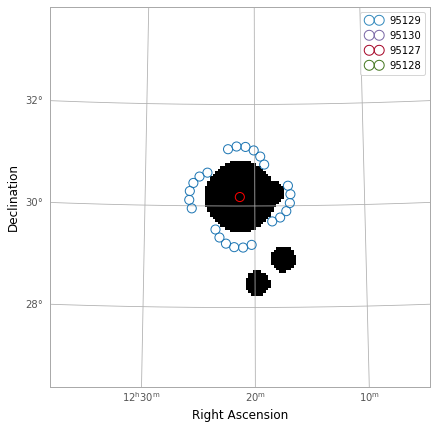

In [6]:
veritas.plot("roi")

### Peek dataset

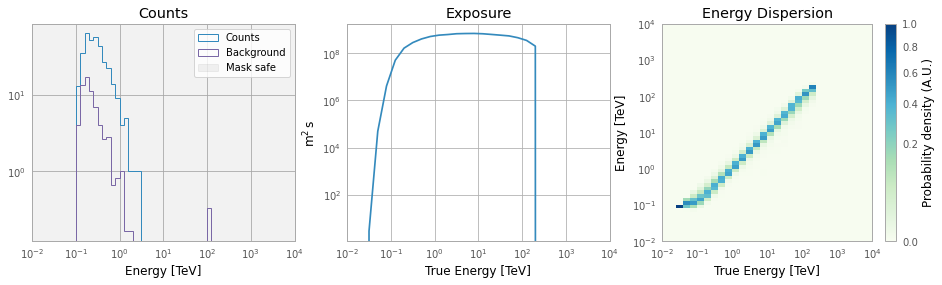

In [7]:
veritas.peek_dataset()

### Apply additional cuts

In [8]:
veritas.construct_dataset(eff_cut=15, bias_cut=15)

2022-06-23 13:10:25 INFO    : N_on: 222, N_off: 163, alpha: 0.167, and sigma=19.7


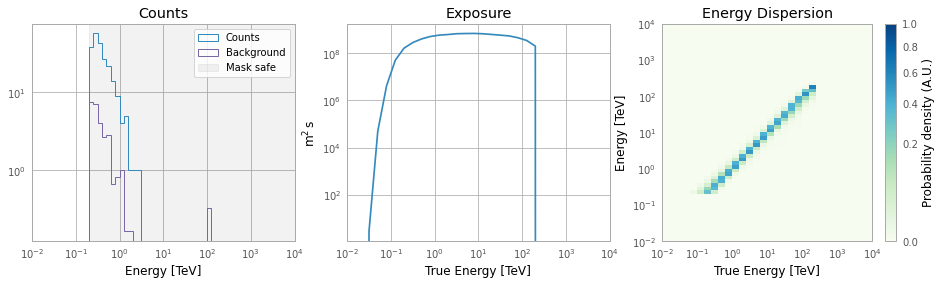

In [9]:
veritas.peek_dataset()

### Perform a fit and do high-level analyses

2022-06-23 13:10:29 INFO    : Fit successfully.
2022-06-23 13:10:29 INFO    : The state is saved as 'simple'. You can load the state by vtspy.VeritasAnalysis('simple').


8.286826202930362


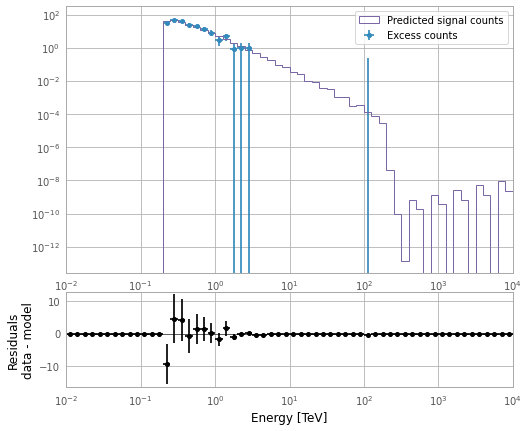

In [10]:
veritas.fit(model="PowerLaw")
veritas.plot("fit")
print(veritas.fit_results.total_stat)

In [11]:
ls ./veritas

95127.anasum.fits  95130.anasum.fits  initial.pickle
95128.anasum.fits  analyzed.pickle    obs-index.fits.gz
95129.anasum.fits  hdu-index.fits.gz  simple.pickle


In [12]:
veritas.analysis()

2022-06-23 13:10:31 INFO    : Generating flux points and SED...
2022-06-23 13:10:39 INFO    : Completed.
2022-06-23 13:10:40 INFO    : The state is saved as 'analyzed'. You can load the state by vtspy.VeritasAnalysis('analyzed').


### Plot the results

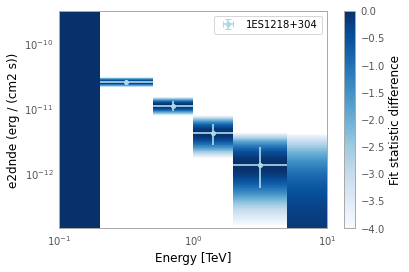

In [13]:
veritas.plot("flux")

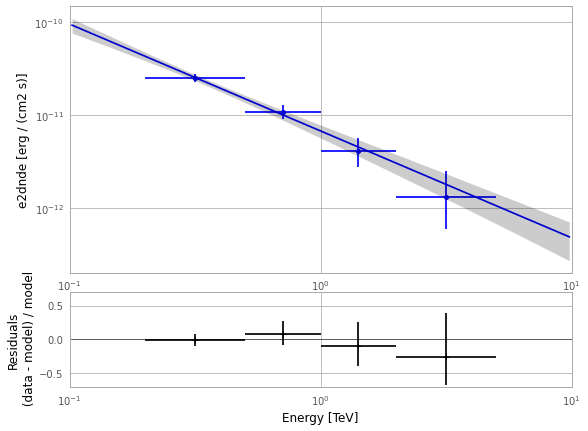

In [14]:
veritas.plot("sed")

In [15]:
veritas.print_flux()

e_ref,e_min,e_max,e2dnde,e2dnde_err,e2dnde_errp,e2dnde_errn,e2dnde_ul,ts,sqrt_ts,npred,npred_excess,stat,is_ul,counts,success,norm_scan,stat_scan
TeV,TeV,TeV,TeV / (cm2 s),TeV / (cm2 s),TeV / (cm2 s),TeV / (cm2 s),TeV / (cm2 s),,,,,,,,,,
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64[1],float32[1],float64,bool,float64[1],bool,float64[11],float64[11]
0.141,0.100,0.200,nan,nan,nan,nan,nan,nan,nan,nan,0.0,0.000,False,0.0,False,0.200 .. 5.000,nan .. nan
0.316,0.200,0.501,1.582e-11,1.423e-12,1.460e-12,1.388e-12,1.881e-11,284.767,16.875,165.3151504825863,144.20168,2.921,False,165.0,True,0.200 .. 5.000,149.504 .. 665.632
0.708,0.501,1.000,6.846e-12,1.137e-12,1.193e-12,1.082e-12,9.346e-12,92.381,9.612,45.01661193588719,40.686104,0.025,False,45.0,True,0.200 .. 5.000,48.890 .. 162.791
1.413,1.000,1.995,2.564e-12,9.189e-13,1.019e-12,8.296e-13,4.813e-12,17.920,4.233,10.165660799566224,8.863527,1.825,False,10.0,True,0.200 .. 5.000,10.565 .. 50.277
3.162,1.995,5.012,8.344e-13,5.900e-13,7.366e-13,4.600e-13,2.625e-12,6.300,2.510,1.9999876712352769,1.9999877,1.484,False,2.0,True,0.200 .. 5.000,3.789 .. 16.942
7.079,5.012,10.000,nan,nan,6.345e-13,nan,nan,-0.000,-0.000,5.257018186085354e-05,5.257018e-05,0.000,True,0.0,False,0.200 .. 5.000,0.141 .. 3.533


### Generate light curve

In [16]:
veritas.analysis(jobs="lc", nbins=2)

2022-06-23 13:10:43 INFO    : Generating lightcurve...
2022-06-23 13:10:43 INFO    : The number of time intervals is 2
2022-06-23 13:10:46 INFO    : Generating lightcurve is completed.
2022-06-23 13:10:46 INFO    : The state is saved as 'analyzed'. You can load the state by vtspy.VeritasAnalysis('analyzed').


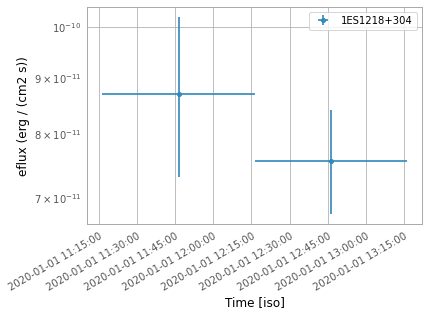

In [17]:
veritas.plot("lc")

In [18]:
veritas.print_lightcurve()

time_min,time_max,e_ref,e_min,e_max,eflux,eflux_err,eflux_errp,eflux_errn,eflux_ul,ts,sqrt_ts,npred,npred_excess,stat,is_ul,counts,success,norm_scan,stat_scan
,,TeV,TeV,TeV,TeV / (cm2 s),TeV / (cm2 s),TeV / (cm2 s),TeV / (cm2 s),TeV / (cm2 s),,,,,,,,,,
float64,float64,float64[1],float64[1],float64[1],float64[1],float64[1],float64[1],float64[1],float64[1],float64[1],float64[1],"float64[1,4]","float64[1,4]",float64[1],bool[1],"float64[1,4]",bool[1],"float64[1,11]","float64[1,11]"
58849.46967202546,58849.51128987268,1.0000000000000002,0.10000000000000002,10.000000000000002,5.4265711779484334e-11,9.085111481890766e-12,9.524792391156496e-12,8.659349138480458e-12,7.422092077215183e-11,83.39786414094083,9.132243105663626,nan .. nan,nan .. nan,6.177400630136317,False,nan .. nan,True,0.2 .. 4.999999999999999,50.91140798765545 .. 178.51796246786486
58849.51128987268,58849.5529077199,1.0000000000000002,0.10000000000000002,10.000000000000002,4.713645818327796e-11,5.136351735128114e-12,5.2719693767906815e-12,4.973648952852488e-12,5.801252050317832e-11,203.78592005341673,14.275360592763208,53.71317737321075 .. nan,48.0087890625 .. nan,31.92495604248873,False,53.0 .. nan,True,0.2 .. 4.999999999999999,129.62314417037635 .. 544.9638753391071
